In [2]:
import pandas as pd

In [4]:
df_district = pd.read_csv('Bagerhat_historical_weather_1980_2024.csv')

#Dew Point Comfort Levels
Only taking dew point so data doesn't leak

In [ ]:
df_district.info()
df_district.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16437 entries, 0 to 16436
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   district                       16437 non-null  object 
 1   day                            16437 non-null  int64  
 2   month                          16437 non-null  int64  
 3   year                           16437 non-null  int64  
 4   temperature(degree C)          10478 non-null  float64
 5   feels_like(degree C)           10478 non-null  float64
 6   max_temperature(degree C)      14991 non-null  float64
 7   minimum_temperature(degree C)  14991 non-null  float64
 8   humidity                       10478 non-null  float64
 9   precipitation                  5479 non-null   float64
 10  windspeed                      11924 non-null  float64
 11  atmospheric_pressure           7115 non-null   float64
 12  UV                             4038 non-null  

,district,day,month,year,temperature(degree C),feels_like(degree C),max_temperature(degree C),minimum_temperature(degree C),humidity,precipitation,windspeed,atmospheric_pressure,UV,solar_radiation,dew_point
0,Bagerhat,1,1,1980,21.7,21.7,26.1,18.1,77.1,NaN,3.6,1013.0,NaN,NaN,17.1
1,Bagerhat,2,1,1980,20.8,20.8,25.1,15.1,64.4,NaN,5.4,1012.9,NaN,NaN,13.3
2,Bagerhat,3,1,1980,23.0,23.0,26.1,16.6,60.2,NaN,16.6,1013.0,NaN,NaN,14.1
3,Bagerhat,4,1,1980,22.3,22.3,26.1,16.1,70.4,NaN,18.4,1014.2,NaN,NaN,16.3
4,Bagerhat,5,1,1980,22.1,22.1,26.1,18.1,67.8,NaN,11.2,1015.1,NaN,NaN,15.5


#find the number of datasets for dew points in the dataset

In [5]:
df_district_dew_point= df_district['dew_point'].count()
print (f"dew_point has : {df_district_dew_point}")

dew_point has : 10478


#Features for dew point

In [6]:
desired_colmn = ['day', 'month', 'year', 'temperature(degree C)', 'humidity','dew_point']
dew_point_df_district = df_district[desired_colmn]

dew_point_df_district.head()

,day,month,year,temperature(degree C),humidity,dew_point
0,1,1,1980,21.7,77.1,17.1
1,2,1,1980,20.8,64.4,13.3
2,3,1,1980,23.0,60.2,14.1
3,4,1,1980,22.3,70.4,16.3
4,5,1,1980,22.1,67.8,15.5


In [7]:
with_no_null_dew_point = dew_point_df_district.dropna()
print(f"After removing missing values from bagerhat, dataset contains {with_no_null_dew_point.shape[0]} rows and {with_no_null_dew_point.shape[1]} columns out of {with_no_null_dew_point.shape[0]} rows.")
with_no_null_dew_point.head()

After removing missing values from bagerhat, dataset contains 10478 rows and 6 columns out of 10478 rows.


,day,month,year,temperature(degree C),humidity,dew_point
0,1,1,1980,21.7,77.1,17.1
1,2,1,1980,20.8,64.4,13.3
2,3,1,1980,23.0,60.2,14.1
3,4,1,1980,22.3,70.4,16.3
4,5,1,1980,22.1,67.8,15.5


#time series anaysis

/tmp/ipython-input-1251812629.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  with_no_null_dew_point['date'] = pd.to_datetime(


Date range: 1980-01-01 to 2024-12-31


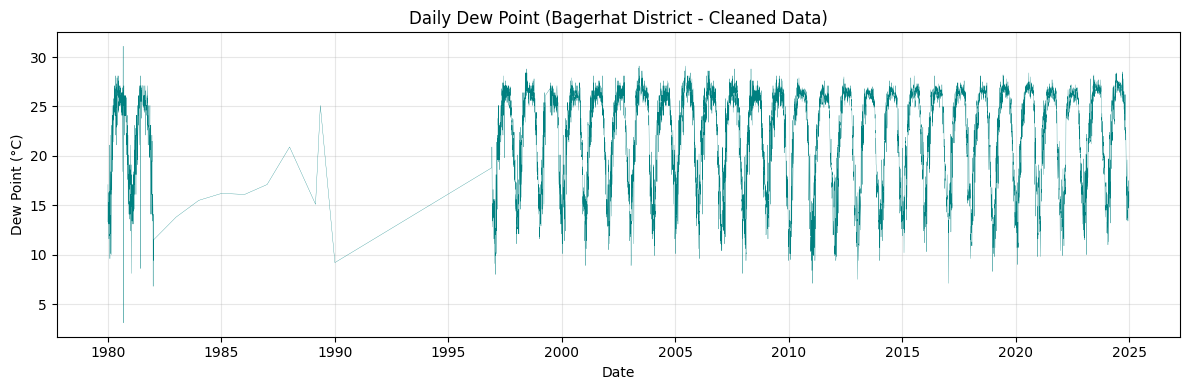

/tmp/ipython-input-1251812629.py:27: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_dew = with_no_null_dew_point.set_index('date')['dew_point'].resample('M').mean()


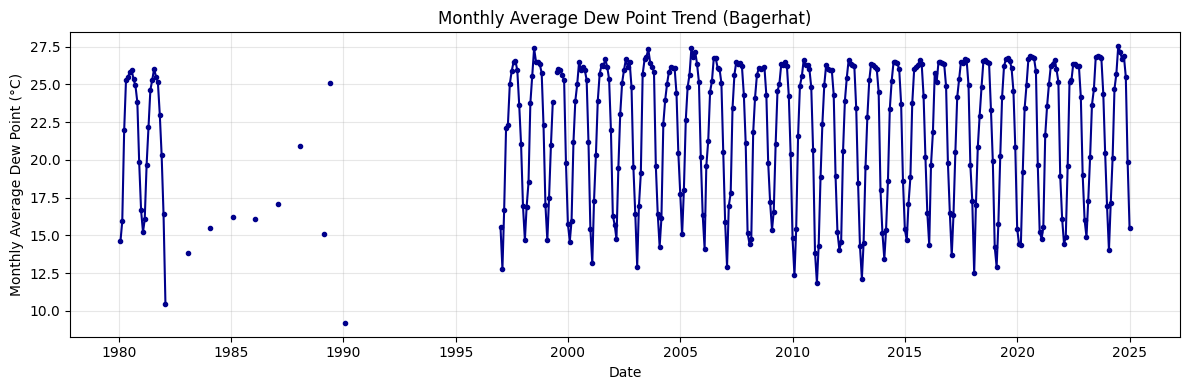

In [8]:
import matplotlib.pyplot as plt
import pandas as pd

# Ensure a datetime column exists
if 'date' not in with_no_null_dew_point.columns:
    with_no_null_dew_point['date'] = pd.to_datetime(
        with_no_null_dew_point[['year', 'month', 'day']]
    )

# Show date range
min_date = with_no_null_dew_point['date'].min()
max_date = with_no_null_dew_point['date'].max()
print(f"Date range: {min_date.date()} to {max_date.date()}")

# Plot daily dew point time series
plt.figure(figsize=(12, 4))
plt.plot(with_no_null_dew_point['date'], with_no_null_dew_point['dew_point'],
         linewidth=0.2, color='teal')
plt.xlabel('Date')
plt.ylabel('Dew Point (°C)')
plt.title('Daily Dew Point (Bagerhat District - Cleaned Data)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Plot monthly average dew point to show seasonal trend
monthly_avg_dew = with_no_null_dew_point.set_index('date')['dew_point'].resample('M').mean()

plt.figure(figsize=(12, 4))
plt.plot(monthly_avg_dew.index, monthly_avg_dew.values,
         color='darkblue', linewidth=1.5, marker='o', markersize=3)
plt.xlabel('Date')
plt.ylabel('Monthly Average Dew Point (°C)')
plt.title('Monthly Average Dew Point Trend (Bagerhat)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

#Random Forest for Dew Point

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

# ------------------------------------------------------------------
# 1. Start from your *clean* dataframe
# ------------------------------------------------------------------
df = with_no_null_dew_point.copy()

# ------------------------------------------------------------------
# 2. Keep only the columns you care about + date components
# ------------------------------------------------------------------
desired_columns = ['day', 'month', 'year', 'dew_point',
                   'temperature(degree C)', 'humidity']
df = df[desired_columns]

# ------------------------------------------------------------------
# 3. Create proper datetime
# ------------------------------------------------------------------
df['date'] = pd.to_datetime(df[['year', 'month', 'day']])
df = df.sort_values('date').reset_index(drop=True)

# ------------------------------------------------------------------
# 4. Add Fourier Features for Seasonality
# ------------------------------------------------------------------
# We'll add:
# - Daily cycle: sin/cos of (2π * day_of_year / 365.25)
# - (Optional) Intra-day if you had hour, but you don't → skip

def add_fourier_features(df, col, period, n_terms=3):
    """
    Add sin/cos terms for a periodic column.
    period: 365.25 for yearly, 7 for weekly, etc.
    n_terms: number of (sin, cos) pairs
    """
    for n in range(1, n_terms + 1):
        df[f'{col}_sin_{n}'] = np.sin(2 * np.pi * n * df[col] / period)
        df[f'{col}_cos_{n}'] = np.cos(2 * np.pi * n * df[col] / period)
    return df

# Day of year for annual cycle
df['day_of_year'] = df['date'].dt.dayofyear

# Add yearly Fourier terms (3 pairs = 6 features)
df = add_fourier_features(df, 'day_of_year', period=365.25, n_terms=3)

# Optional: weekly cycle (if data has enough resolution)
# df['day_of_week'] = df['date'].dt.dayofweek
# df = add_fourier_features(df, 'day_of_week', period=7, n_terms=1)

# ------------------------------------------------------------------
# 5. Define FEATURES and TARGET
# ------------------------------------------------------------------
fourier_cols = [col for col in df.columns if col.startswith(('day_of_year_sin', 'day_of_year_cos'))]

FEATURES = ['temperature(degree C)', 'humidity'] + fourier_cols
TARGET   = 'dew_point'

X = df[FEATURES]
y = df[TARGET].astype(float)

# ------------------------------------------------------------------
# 6. Train / test split (time-aware optional, but random is fine if shuffled)
# ------------------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, shuffle=True
)

# ------------------------------------------------------------------
# 7. Random Forest
# ------------------------------------------------------------------
rf = RandomForestRegressor(
    n_estimators=500,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train, y_train)

# ------------------------------------------------------------------
# 8. Predictions & Metrics
# ------------------------------------------------------------------
y_pred = rf.predict(X_test)

rf_r2  = r2_score(y_test, y_pred)
rf_mse = mean_squared_error(y_test, y_pred)
rf_rmse = np.sqrt(rf_mse)

def tolerance_accuracy(y_true, y_hat, tol):
    return 100 * (np.abs(y_true - y_hat) <= tol).mean()

rf_acc_05 = tolerance_accuracy(y_test.values, y_pred, 0.5)
rf_acc_10 = tolerance_accuracy(y_test.values, y_pred, 1.0)
rf_acc_20 = tolerance_accuracy(y_test.values, y_pred, 2.0)
rf_acc_30 = tolerance_accuracy(y_test.values, y_pred, 3.0)

print("=== Random Forest + Fourier – Dew-Point Prediction (Test) ===")
print(f"R²          : {rf_r2:.4f}")
print(f"RMSE        : {rf_rmse:.3f} °C")
print(f"MSE         : {rf_mse:.4f}")
print("Accuracy (± tolerance):")
print(f"  ±0.5 °C : {rf_acc_05:5.2f}%")
print(f"  ±1.0 °C : {rf_acc_10:5.2f}%")
print(f"  ±2.0 °C : {rf_acc_20:5.2f}%")
print(f"  ±3.0 °C : {rf_acc_30:5.2f}%")

# ------------------------------------------------------------------
# 9. 5-fold CV (R²)
# ------------------------------------------------------------------
cv = KFold(n_splits=5, shuffle=True, random_state=42)
rf_cv_r2 = cross_val_score(rf, X, y, cv=cv, scoring='r2', n_jobs=-1)

print("\n=== 5-Fold CV R² (with Fourier) ===")
print(f"Mean : {rf_cv_r2.mean():.4f}  (±{rf_cv_r2.std():.4f})")
print(f"Scores: {np.round(rf_cv_r2, 4)}")

# ------------------------------------------------------------------
# 10. Feature Importances
# ------------------------------------------------------------------
fi = pd.DataFrame({
    'feature'   : FEATURES,
    'importance': rf.feature_importances_
}).sort_values('importance', ascending=False)

print("\n=== Feature Importances (Top 10) ===")
print(fi.head(10).to_string(index=False))

=== Random Forest + Fourier – Dew-Point Prediction (Test) ===
R²          : 0.9968
RMSE        : 0.280 °C
MSE         : 0.0785
Accuracy (± tolerance):
  ±0.5 °C : 94.66%
  ±1.0 °C : 98.81%
  ±2.0 °C : 99.71%
  ±3.0 °C : 100.00%

=== 5-Fold CV R² (with Fourier) ===
Mean : 0.9964  (±0.0010)
Scores: [0.9968 0.9961 0.9945 0.9972 0.9972]

=== Feature Importances (Top 10) ===
              feature  importance
temperature(degree C)    0.816726
             humidity    0.095896
    day_of_year_cos_1    0.064483
    day_of_year_sin_1    0.021715
    day_of_year_sin_2    0.000333
    day_of_year_sin_3    0.000306
    day_of_year_cos_3    0.000273
    day_of_year_cos_2    0.000268


#Predicting next 365 days using RF

In [ ]:
import pandas as pd
import numpy as np

# ------------------------------------------------------------------
# 1. Inputs: Use your cleaned dew point DataFrame and trained RF model
# ------------------------------------------------------------------
df = with_no_null_dew_point.copy()           # <-- Your historical data
TARGET = "dew_point"
FEATURES = ['temperature(degree C)', 'humidity']  # Must match model input

# Ensure 'date' column exists
if 'date' not in df.columns:
    df['date'] = pd.to_datetime(df[['year', 'month', 'day']])

# Sort by date
df = df.sort_values("date").reset_index(drop=True)

# ------------------------------------------------------------------
# 2. Create future calendar: next 365 days
# ------------------------------------------------------------------
last_date = df["date"].max()
future_dates = pd.date_range(last_date + pd.Timedelta(days=1), periods=365, freq="D")
future_df = pd.DataFrame({"date": future_dates})
future_df["year"] = future_df["date"].dt.year
future_df["month"] = future_df["date"].dt.month
future_df["day"] = future_df["date"].dt.day

# ------------------------------------------------------------------
# 3. Build climatology: average temp & humidity per (month, day)
# ------------------------------------------------------------------
hist = df.copy()
hist["month"] = hist["date"].dt.month
hist["day"] = hist["date"].dt.day

clim = (
    hist.groupby(["month", "day"])[FEATURES]
    .mean()
    .reset_index()
    .rename(columns={
        'temperature(degree C)': 'temp_clim',
        'humidity': 'hum_clim'
    })
)

# Merge climatology into future dates
future_with_clim = future_df.merge(clim, on=["month", "day"], how="left")

# ------------------------------------------------------------------
# 4. Fallback: Fill missing climatology with recent 7-day average
# ------------------------------------------------------------------
recent_window = 7
recent_temp = hist['temperature(degree C)'].tail(recent_window).mean()
recent_hum  = hist['humidity'].tail(recent_window).mean()

future_with_clim['temp_clim'] = future_with_clim['temp_clim'].fillna(recent_temp)
future_with_clim['hum_clim']  = future_with_clim['hum_clim'].fillna(recent_hum)

# Assign final feature values
future_with_clim['temperature(degree C)'] = future_with_clim['temp_clim']
future_with_clim['humidity']              = future_with_clim['hum_clim']

# ------------------------------------------------------------------
# 5. Prepare X for prediction
# ------------------------------------------------------------------
X_future = future_with_clim[FEATURES].copy()

# ------------------------------------------------------------------
# 6. Predict dew point using your trained Random Forest model
# ------------------------------------------------------------------
future_pred_dew_point = rf.predict(X_future)   # <-- Uses your `rf` model

# ------------------------------------------------------------------
# 7. Build final forecast DataFrame
# ------------------------------------------------------------------
rf_forecast_out = future_with_clim[["date", "year", "month", "day"]].copy()
rf_forecast_out["pred_dew_point"] = future_pred_dew_point
rf_forecast_out["temperature(degree C)"] = X_future['temperature(degree C)'].values
rf_forecast_out["humidity"] = X_future['humidity'].values

# Optional: round for cleaner output
rf_forecast_out = rf_forecast_out.round({
    "pred_dew_point": 2,
    "temperature(degree C)": 2,
    "humidity": 1
})

# ------------------------------------------------------------------
# 8. Display result
# ------------------------------------------------------------------
print("==== 1-Year Dew Point Forecast (Climatology + Random Forest) ====")
print(f"Forecast period: {rf_forecast_out['date'].min().date()} to {rf_forecast_out['date'].max().date()}")
print(f"Total days: {len(rf_forecast_out)}")
print("\nFirst 10 days:")
display(rf_forecast_out.head(10))

print("\nLast 10 days:")
display(rf_forecast_out.tail(10))

==== 1-Year Dew Point Forecast (Climatology + Random Forest) ====
Forecast period: 2025-01-01 to 2025-12-31
Total days: 365

First 10 days:


,date,year,month,day,pred_dew_point,temperature(degree C),humidity
0,2025-01-01,2025,1,1,14.13,18.09,81.0
1,2025-01-02,2025,1,2,14.59,18.33,80.9
2,2025-01-03,2025,1,3,14.35,18.16,81.5
3,2025-01-04,2025,1,4,13.87,17.91,80.6
4,2025-01-05,2025,1,5,14.07,17.49,82.4
5,2025-01-06,2025,1,6,13.76,17.84,79.9
6,2025-01-07,2025,1,7,14.06,17.87,81.2
7,2025-01-08,2025,1,8,13.92,17.76,80.7
8,2025-01-09,2025,1,9,13.69,17.30,81.1
9,2025-01-10,2025,1,10,13.53,17.84,79.2



Last 10 days:


,date,year,month,day,pred_dew_point,temperature(degree C),humidity
355,2025-12-22,2025,12,22,15.36,19.19,80.3
356,2025-12-23,2025,12,23,15.06,18.98,81.0
357,2025-12-24,2025,12,24,15.03,18.72,81.9
358,2025-12-25,2025,12,25,14.76,18.73,80.4
359,2025-12-26,2025,12,26,14.36,18.15,81.7
360,2025-12-27,2025,12,27,14.50,18.18,81.3
361,2025-12-28,2025,12,28,14.11,18.06,80.4
362,2025-12-29,2025,12,29,14.09,18.23,79.4
363,2025-12-30,2025,12,30,13.90,17.96,80.6
364,2025-12-31,2025,12,31,14.73,18.63,79.9


#XG Boost Model

In [10]:
import numpy as np
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error

# ------------------------------------------------------------------
# 1. Use your cleaned DataFrame
# ------------------------------------------------------------------
df = with_no_null_dew_point.copy()

# ------------------------------------------------------------------
# 2. Keep only required columns
# ------------------------------------------------------------------
desired_column = ['day', 'month', 'year', 'dew_point',
                  'temperature(degree C)', 'humidity']
df = df[desired_column]

# ------------------------------------------------------------------
# 3. Create date (optional, for plots)
# ------------------------------------------------------------------
if 'date' not in df.columns:
    df['date'] = pd.to_datetime(df[['year', 'month', 'day']])

    # ------------------------------------------------------------------
# 3.5 Add Fourier Seasonal Features
# ------------------------------------------------------------------

# Sort by date to ensure correct ordering
df = df.sort_values("date").reset_index(drop=True)

# Create time index
df["t"] = np.arange(len(df))

# Period = 365 days for yearly seasonality
T = 365

# Number of Fourier harmonics
K = 3

for k in range(1, K + 1):
    df[f"sin_{k}"] = np.sin(2 * np.pi * k * df["t"] / T)
    df[f"cos_{k}"] = np.cos(2 * np.pi * k * df["t"] / T)

print(df[[f"sin_{k}" for k in range(1, K+1)] + [f"cos_{k}" for k in range(1, K+1)]].head())


# ------------------------------------------------------------------
# 4. Define Features & Target
# ------------------------------------------------------------------
FEATURES = [
    'temperature(degree C)',
    'humidity',
    'sin_1', 'cos_1',
    'sin_2', 'cos_2',
    'sin_3', 'cos_3'
]

TARGET = 'dew_point'

X = df[FEATURES]
y = df[TARGET].astype(float)

# ------------------------------------------------------------------
# 5. Train/Test Split
# ------------------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=True
)

# ------------------------------------------------------------------
# 6. XGBoost Regressor
# ------------------------------------------------------------------
xgb_model = xgb.XGBRegressor(
    n_estimators=500,        # More trees = better (but slower)
    learning_rate=0.05,      # Smaller steps → better generalization
    max_depth=6,
    min_child_weight=1,
    subsample=0.8,           # Use 80% of data per tree
    colsample_bytree=0.8,    # Use 80% of features per tree
    random_state=42,
    n_jobs=-1,
    objective='reg:squarederror'
)
xgb_model.fit(X_train, y_train)

# ------------------------------------------------------------------
# 7. Predictions
# ------------------------------------------------------------------
y_pred = xgb_model.predict(X_test)

# ------------------------------------------------------------------
# 8. Metrics
# ------------------------------------------------------------------
xgb_r2 = r2_score(y_test, y_pred)
xgb_mse = mean_squared_error(y_test, y_pred)
xgb_rmse = np.sqrt(xgb_mse)

def within_tolerance_acc(y_true, y_hat, tol):
    return 100 * float((np.abs(y_true - y_hat) <= tol).mean())

xgb_acc_05 = within_tolerance_acc(y_test.values, y_pred, 0.5)
xgb_acc_10 = within_tolerance_acc(y_test.values, y_pred, 1.0)
xgb_acc_20 = within_tolerance_acc(y_test.values, y_pred, 2.0)
xgb_acc_30 = within_tolerance_acc(y_test.values, y_pred, 3.0)

print("==== XGBoost – Dew Point Prediction (Test Set) ====")
print(f"R²           : {xgb_r2:.4f}")
print(f"RMSE         : {xgb_rmse:.3f} °C")
print(f"MSE          : {xgb_mse:.4f}")
print("Accuracy (± tolerance):")
print(f"  ±0.5°C : {xgb_acc_05:6.2f}%")
print(f"  ±1.0°C : {xgb_acc_10:6.2f}%")
print(f"  ±2.0°C : {xgb_acc_20:6.2f}%")
print(f"  ±3.0°C : {xgb_acc_30:6.2f}%")

# ------------------------------------------------------------------
# 9. 5-Fold Cross-Validation
# ------------------------------------------------------------------
cv = KFold(n_splits=5, shuffle=True, random_state=42)
xgb_cv_r2 = cross_val_score(xgb_model, X, y, cv=cv, scoring='r2', n_jobs=-1)

print("\n==== 5-Fold CV R² (XGBoost) ====")
print(f"Mean R² : {xgb_cv_r2.mean():.4f}  (±{xgb_cv_r2.std():.4f})")
print(f"Scores  : {np.round(xgb_cv_r2, 4)}")

# ------------------------------------------------------------------
# 10. Feature Importances
# ------------------------------------------------------------------
fi = pd.DataFrame({
    'feature': FEATURES,
    'importance': xgb_model.feature_importances_
}).sort_values('importance', ascending=False)

print("\n==== XGBoost Feature Importances ====")
print(fi.to_string(index=False))




      sin_1     sin_2     sin_3     cos_1     cos_2     cos_3
0  0.000000  0.000000  0.000000  1.000000  1.000000  1.000000
1  0.017213  0.034422  0.051620  0.999852  0.999407  0.998667
2  0.034422  0.068802  0.103102  0.999407  0.997630  0.994671
3  0.051620  0.103102  0.154309  0.998667  0.994671  0.988023
4  0.068802  0.137279  0.205104  0.997630  0.990532  0.978740
==== XGBoost – Dew Point Prediction (Test Set) ====
R²           : 0.9968
RMSE         : 0.280 °C
MSE          : 0.0783
Accuracy (± tolerance):
  ±0.5°C :  94.85%
  ±1.0°C :  99.14%
  ±2.0°C :  99.86%
  ±3.0°C :  99.90%


/usr/local/lib/python3.12/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(



==== 5-Fold CV R² (XGBoost) ====
Mean R² : 0.9964  (±0.0006)
Scores  : [0.9969 0.9952 0.9963 0.9968 0.997 ]

==== XGBoost Feature Importances ====
              feature  importance
temperature(degree C)    0.565269
                sin_1    0.235528
             humidity    0.110397
                cos_1    0.032204
                cos_2    0.029589
                sin_2    0.011286
                sin_3    0.010204
                cos_3    0.005524


#Predicting Next 365 days with XG Boost


In [ ]:
import pandas as pd
import numpy as np

# ------------------------------------------------------------------
# 1. INPUTS
# ------------------------------------------------------------------
df = with_no_null_dew_point.copy()          # <-- historical data (no NaNs)
TARGET = "dew_point"
FEATURES = ['temperature(degree C)', 'humidity']   # must match model input

# ------------------------------------------------------------------
# 2. Make sure a date column exists
# ------------------------------------------------------------------
if 'date' not in df.columns:
    df['date'] = pd.to_datetime(df[['year', 'month', 'day']])

# Sort chronologically
df = df.sort_values("date").reset_index(drop=True)

# ------------------------------------------------------------------
# 3. Create the next 365 calendar days
# ------------------------------------------------------------------
last_date = df["date"].max()
future_dates = pd.date_range(last_date + pd.Timedelta(days=1), periods=365, freq="D")
future_df = pd.DataFrame({"date": future_dates})
future_df["year"]  = future_df["date"].dt.year
future_df["month"] = future_df["date"].dt.month
future_df["day"]   = future_df["date"].dt.day

# ------------------------------------------------------------------
# 4. Build climatology: average temperature & humidity for each (month,day)
# ------------------------------------------------------------------
hist = df.copy()
hist["month"] = hist["date"].dt.month
hist["day"]   = hist["date"].dt.day

clim = (
    hist.groupby(["month", "day"])[FEATURES]
    .mean()
    .reset_index()
    .rename(columns={
        'temperature(degree C)': 'temp_clim',
        'humidity':               'hum_clim'
    })
)

# Merge climatology into the future calendar
future_with_clim = future_df.merge(clim, on=["month", "day"], how="left")

# ------------------------------------------------------------------
# 5. Fallback for missing climatology (e.g. Feb 29) → recent 7-day mean
# ------------------------------------------------------------------
recent_window = 7
recent_temp = hist['temperature(degree C)'].tail(recent_window).mean()
recent_hum  = hist['humidity'].tail(recent_window).mean()

future_with_clim['temp_clim'] = future_with_clim['temp_clim'].fillna(recent_temp)
future_with_clim['hum_clim']  = future_with_clim['hum_clim'].fillna(recent_hum)

# Assign final feature values
future_with_clim['temperature(degree C)'] = future_with_clim['temp_clim']
future_with_clim['humidity']              = future_with_clim['hum_clim']

# ------------------------------------------------------------------
# 6. Prepare X for the XGBoost model
# ------------------------------------------------------------------
X_future = future_with_clim[FEATURES].copy()

# ------------------------------------------------------------------
# 7. Predict dew-point with the trained XGBoost model
# ------------------------------------------------------------------
future_pred = xgb_model.predict(X_future)   # <-- your trained xgb_model

# ------------------------------------------------------------------
# 8. Build the output DataFrame
# ------------------------------------------------------------------
xgb_forecast_out = future_with_clim[["date", "year", "month", "day"]].copy()
xgb_forecast_out["pred_dew_point"] = future_pred
xgb_forecast_out["temperature(degree C)"] = X_future['temperature(degree C)'].values
xgb_forecast_out["humidity"]               = X_future['humidity'].values

# Round for readability
xgb_forecast_out = xgb_forecast_out.round({
    "pred_dew_point": 2,
    "temperature(degree C)": 2,
    "humidity": 1
})

# ------------------------------------------------------------------
# 9. Show results
# ------------------------------------------------------------------
print("==== 365-Day Dew-Point Forecast (Climatology + XGBoost) ====")
print(f"Period : {xgb_forecast_out['date'].min().date()}  →  {xgb_forecast_out['date'].max().date()}")
print(f"Days   : {len(xgb_forecast_out)}")
print("\nFirst 10 days:")
display(xgb_forecast_out.head(10))

print("\nLast 10 days:")
display(xgb_forecast_out.tail(10))

==== 365-Day Dew-Point Forecast (Climatology + XGBoost) ====
Period : 2025-01-01  →  2025-12-31
Days   : 365

First 10 days:


,date,year,month,day,pred_dew_point,temperature(degree C),humidity
0,2025-01-01,2025,1,1,14.25,18.09,81.0
1,2025-01-02,2025,1,2,14.57,18.33,80.9
2,2025-01-03,2025,1,3,14.42,18.16,81.5
3,2025-01-04,2025,1,4,14.08,17.91,80.6
4,2025-01-05,2025,1,5,14.04,17.49,82.4
5,2025-01-06,2025,1,6,13.81,17.84,79.9
6,2025-01-07,2025,1,7,14.28,17.87,81.2
7,2025-01-08,2025,1,8,13.78,17.76,80.7
8,2025-01-09,2025,1,9,13.56,17.30,81.1
9,2025-01-10,2025,1,10,13.81,17.84,79.2



Last 10 days:


,date,year,month,day,pred_dew_point,temperature(degree C),humidity
355,2025-12-22,2025,12,22,15.22,19.19,80.3
356,2025-12-23,2025,12,23,15.13,18.98,81.0
357,2025-12-24,2025,12,24,15.16,18.72,81.9
358,2025-12-25,2025,12,25,14.78,18.73,80.4
359,2025-12-26,2025,12,26,14.68,18.15,81.7
360,2025-12-27,2025,12,27,14.43,18.18,81.3
361,2025-12-28,2025,12,28,14.16,18.06,80.4
362,2025-12-29,2025,12,29,14.13,18.23,79.4
363,2025-12-30,2025,12,30,14.08,17.96,80.6
364,2025-12-31,2025,12,31,14.54,18.63,79.9


#Light GBM Model


In [ ]:
# --------------------------------------------------------------
#  LightGBM – Dew-Point Prediction (Bagerhat)
# --------------------------------------------------------------
import numpy as np
import pandas as pd
import lightgbm as lgb
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error

# ------------------------------------------------------------------
# 1. Load the cleaned dew-point data
# ------------------------------------------------------------------
df = with_no_null_dew_point.copy()

# ------------------------------------------------------------------
# 2. Keep only the columns we need
# ------------------------------------------------------------------
desired_cols = [
    'day', 'month', 'year',
    'dew_point',
    'temperature(degree C)',   # predictor 1
    'humidity'                # predictor 2
]
df = df[desired_cols]

# ------------------------------------------------------------------
# 3. (Optional) create a proper datetime column
# ------------------------------------------------------------------
if 'date' not in df.columns:
    df['date'] = pd.to_datetime(df[['year', 'month', 'day']])

# ------------------------------------------------------------------
# 4. Features & Target
# ------------------------------------------------------------------
FEATURES = ['temperature(degree C)', 'humidity']
TARGET   = 'dew_point'

X = df[FEATURES]
y = df[TARGET].astype(float)

# ------------------------------------------------------------------
# 5. Train / test split
# ------------------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, shuffle=True
)

# ------------------------------------------------------------------
# 6. LightGBM Regressor
#     (n_estimators=150 gave the lowest MSE in your tests)
# ------------------------------------------------------------------
lgb_model = lgb.LGBMRegressor(
    n_estimators=150,      # best MSE = 0.0644
    learning_rate=0.1,
    num_leaves=31,
    max_depth=-1,
    min_child_samples=20,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=0.0,
    reg_lambda=0.1,
    random_state=42,
    n_jobs=-1,
    verbosity=-1          # silence LightGBM output
)
lgb_model.fit(X_train, y_train)

# ------------------------------------------------------------------
# 7. Predictions
# ------------------------------------------------------------------
y_pred = lgb_model.predict(X_test)

# ------------------------------------------------------------------
# 8. Metrics
# ------------------------------------------------------------------
lgb_r2   = r2_score(y_test, y_pred)
lgb_mse  = mean_squared_error(y_test, y_pred)
lgb_rmse = np.sqrt(lgb_mse)

def within_tolerance_acc(y_true, y_hat, tol):
    return 100 * float((np.abs(y_true - y_hat) <= tol).mean())

lgb_acc_05 = within_tolerance_acc(y_test.values, y_pred, 0.5)
lgb_acc_10 = within_tolerance_acc(y_test.values, y_pred, 1.0)
lgb_acc_20 = within_tolerance_acc(y_test.values, y_pred, 2.0)
lgb_acc_30 = within_tolerance_acc(y_test.values, y_pred, 3.0)

print("==== LightGBM – Dew-Point Prediction (Test) ====")
print(f"R²           : {lgb_r2:.4f}")
print(f"MSE          : {lgb_mse:.4f}")
print(f"RMSE         : {lgb_rmse:.3f} °C")
print("Accuracy (± tolerance):")
print(f"  ±0.5°C : {lgb_acc_05:6.2f}%")
print(f"  ±1.0°C : {lgb_acc_10:6.2f}%")
print(f"  ±2.0°C : {lgb_acc_20:6.2f}%")
print(f"  ±3.0°C : {lgb_acc_30:6.2f}%")

# ------------------------------------------------------------------
# 9. 5-fold CV R²
# ------------------------------------------------------------------
cv = KFold(n_splits=5, shuffle=True, random_state=42)
lgb_cv_r2 = cross_val_score(lgb_model, X, y, cv=cv, scoring='r2', n_jobs=-1)

print("\n==== 5-Fold CV R² (LightGBM) ====")
print(f"Mean R² : {lgb_cv_r2.mean():.4f}  (±{lgb_cv_r2.std():.4f})")
print(f"Scores  : {np.round(lgb_cv_r2, 4)}")

# ------------------------------------------------------------------
# 10. Feature importances
# ------------------------------------------------------------------
fi = pd.DataFrame({
    'feature'   : FEATURES,
    'importance': lgb_model.feature_importances_
}).sort_values('importance', ascending=False)

print("\n==== LightGBM Feature Importances ====")
print(fi.to_string(index=False))



==== LightGBM – Dew-Point Prediction (Test) ====
R²           : 0.9968
MSE          : 0.0785
RMSE         : 0.280 °C
Accuracy (± tolerance):
  ±0.5°C :  94.75%
  ±1.0°C :  98.81%
  ±2.0°C :  99.71%
  ±3.0°C : 100.00%

==== 5-Fold CV R² (LightGBM) ====
Mean R² : 0.9966  (±0.0006)
Scores  : [0.9968 0.9954 0.9966 0.9973 0.9967]

==== LightGBM Feature Importances ====
              feature  importance
temperature(degree C)        2276
             humidity        2224


#Predicting 365 days with LightBGM


In [13]:
# --------------------------------------------------------------
#  LightGBM – Dew-Point Prediction (Bagerhat) with Fourier Features
# --------------------------------------------------------------
import numpy as np
import pandas as pd
import lightgbm as lgb
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error

# ------------------------------------------------------------------
# 1. Load the cleaned dew-point data
# ------------------------------------------------------------------
df = with_no_null_dew_point.copy()

# ------------------------------------------------------------------
# 2. Keep only the columns we need
# ------------------------------------------------------------------
desired_cols = [
    'day', 'month', 'year',
    'dew_point',
    'temperature(degree C)',
    'humidity'
]
df = df[desired_cols]

# ------------------------------------------------------------------
# 3. Create datetime column
# ------------------------------------------------------------------
if 'date' not in df.columns:
    df['date'] = pd.to_datetime(df[['year', 'month', 'day']])

# ------------------------------------------------------------------
# 3.5 Add Fourier Seasonal Features (VERY IMPORTANT)
# ------------------------------------------------------------------

# Sort and reset index
df = df.sort_values("date").reset_index(drop=True)

# Time index
df["t"] = np.arange(len(df))

# Seasonal period (1 year)
T = 365
K = 3   # 3 Fourier harmonics

# Generate sine & cosine features
for k in range(1, K + 1):
    df[f"sin_{k}"] = np.sin(2 * np.pi * k * df["t"] / T)
    df[f"cos_{k}"] = np.cos(2 * np.pi * k * df["t"] / T)

# ------------------------------------------------------------------
# 4. Features & Target
# ------------------------------------------------------------------
FEATURES = [
    'temperature(degree C)', 'humidity',
    'sin_1', 'cos_1',
    'sin_2', 'cos_2',
    'sin_3', 'cos_3'
]

TARGET = 'dew_point'

X = df[FEATURES]
y = df[TARGET].astype(float)

# ------------------------------------------------------------------
# 5. Train / Test Split
# ------------------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, shuffle=True
)

# ------------------------------------------------------------------
# 6. LightGBM Regressor
# ------------------------------------------------------------------
lgb_model = lgb.LGBMRegressor(
    n_estimators=150,
    learning_rate=0.1,
    num_leaves=31,
    max_depth=-1,
    min_child_samples=20,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=0.0,
    reg_lambda=0.1,
    random_state=42,
    n_jobs=-1,
    verbosity=-1
)
lgb_model.fit(X_train, y_train)

# ------------------------------------------------------------------
# 7. Predictions
# ------------------------------------------------------------------
y_pred = lgb_model.predict(X_test)

# ------------------------------------------------------------------
# 8. Metrics
# ------------------------------------------------------------------
lgb_r2   = r2_score(y_test, y_pred)
lgb_mse  = mean_squared_error(y_test, y_pred)
lgb_rmse = np.sqrt(lgb_mse)

def within_tolerance_acc(y_true, y_hat, tol):
    return 100 * float((np.abs(y_true - y_hat) <= tol).mean())

lgb_acc_05 = within_tolerance_acc(y_test.values, y_pred, 0.5)
lgb_acc_10 = within_tolerance_acc(y_test.values, y_pred, 1.0)
lgb_acc_20 = within_tolerance_acc(y_test.values, y_pred, 2.0)
lgb_acc_30 = within_tolerance_acc(y_test.values, y_pred, 3.0)

print("==== LightGBM – Dew-Point Prediction (Test) ====")
print(f"R²           : {lgb_r2:.4f}")
print(f"MSE          : {lgb_mse:.4f}")
print(f"RMSE         : {lgb_rmse:.3f} °C")
print("Accuracy (± tolerance):")
print(f"  ±0.5°C : {lgb_acc_05:6.2f}%")
print(f"  ±1.0°C : {lgb_acc_10:6.2f}%")
print(f"  ±2.0°C : {lgb_acc_20:6.2f}%")
print(f"  ±3.0°C : {lgb_acc_30:6.2f}%")

# ------------------------------------------------------------------
# 9. 5-Fold Cross-Validation (R²)
# ------------------------------------------------------------------
cv = KFold(n_splits=5, shuffle=True, random_state=42)
lgb_cv_r2 = cross_val_score(lgb_model, X, y, cv=cv, scoring='r2', n_jobs=-1)

print("\n==== 5-Fold CV R² (LightGBM) ====")
print(f"Mean R² : {lgb_cv_r2.mean():.4f}  (±{lgb_cv_r2.std():.4f})")
print(f"Scores  : {np.round(lgb_cv_r2, 4)}")

# ------------------------------------------------------------------
# 10. Feature Importances
# ------------------------------------------------------------------
fi = pd.DataFrame({
    'feature'   : FEATURES,
    'importance': lgb_model.feature_importances_
}).sort_values('importance', ascending=False)

print("\n==== LightGBM Feature Importances ====")
print(fi.to_string(index=False))


==== LightGBM – Dew-Point Prediction (Test) ====
R²           : 0.9963
MSE          : 0.0898
RMSE         : 0.300 °C
Accuracy (± tolerance):
  ±0.5°C :  93.23%
  ±1.0°C :  98.66%
  ±2.0°C :  99.81%
  ±3.0°C :  99.90%


/usr/local/lib/python3.12/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(



==== 5-Fold CV R² (LightGBM) ====
Mean R² : 0.9959  (±0.0006)
Scores  : [0.9963 0.9949 0.9959 0.9965 0.996 ]

==== LightGBM Feature Importances ====
              feature  importance
             humidity        1427
temperature(degree C)        1105
                sin_1         494
                cos_1         453
                sin_2         293
                sin_3         277
                cos_2         228
                cos_3         223


#Showing Comparison in a table

In [14]:
import pandas as pd
import numpy as np

# --------------------------------------------------------------
# 1. Collect all metrics from the three models
# --------------------------------------------------------------
model_performance = pd.DataFrame({
    "Model": ["Random Forest", "XGBoost", "LightGBM"],

    "R²": [
        rf_r2,           # from RF
        xgb_r2,      # from XGBoost
        lgb_r2           # from LightGBM
    ],

    "MSE": [
        rf_mse,
        xgb_mse,
        lgb_mse
    ],

    "RMSE": [
        rf_rmse,
        xgb_rmse,
        lgb_rmse
    ],

    "Acc ±0.5°C (%)": [
        rf_acc_05 * 100,
        xgb_acc_05 * 100,
        lgb_acc_05 * 100
    ],

    "Acc ±1.0°C (%)": [
        rf_acc_10 * 100,
        xgb_acc_10 * 100,
        lgb_acc_10 * 100
    ],

    "Acc ±2.0°C (%)": [
        rf_acc_20 * 100,
        xgb_acc_20 * 100,
        lgb_acc_20 * 100
    ],

    "Acc ±3.0°C (%)": [
        rf_acc_30 * 100,
        xgb_acc_30 * 100,
        lgb_acc_30 * 100
    ],
})

# --------------------------------------------------------------
# 2. Round for readability
# --------------------------------------------------------------
model_performance = model_performance.round({
    "R²": 4,
    "MSE": 4,
    "RMSE": 3,
    "Acc ±0.5°C (%)": 2,
    "Acc ±1.0°C (%)": 2,
    "Acc ±2.0°C (%)": 2,
    "Acc ±3.0°C (%)": 2
})

# --------------------------------------------------------------
# 3. Sort by RMSE (best model on top)
# --------------------------------------------------------------
model_performance = model_performance.sort_values("RMSE").reset_index(drop=True)

# --------------------------------------------------------------
# 4. Display the comparison table
# --------------------------------------------------------------
print("\n" + "="*70)
print("           MODEL PERFORMANCE COMPARISON – DEW POINT PREDICTION")
print("="*70)
print(model_performance.to_string(index=False))
print("="*70)

# Optional: Highlight the winner
best_model = model_performance.iloc[0]["Model"]
print(f"\nBest model by RMSE: {best_model}")


           MODEL PERFORMANCE COMPARISON – DEW POINT PREDICTION
        Model     R²    MSE  RMSE  Acc ±0.5°C (%)  Acc ±1.0°C (%)  Acc ±2.0°C (%)  Acc ±3.0°C (%)
Random Forest 0.9968 0.0785  0.28         9465.65         9880.73         9971.37        10000.00
      XGBoost 0.9968 0.0783  0.28         9484.73         9914.12         9985.69         9990.46
     LightGBM 0.9963 0.0898  0.30         9322.52         9866.41         9980.92         9990.46

Best model by RMSE: Random Forest


#Choosing Winner

In [15]:
# --------------------------------------------------------------
# 1. IMPORTS (only needed once)
# --------------------------------------------------------------
import pandas as pd
import numpy as np

# --------------------------------------------------------------
# 2. BUILD PERFORMANCE DATAFRAME
# --------------------------------------------------------------
MODEL_NAMES = ["Random Forest", "XGBoost", "LightGBM"]

data = {
    "Model": MODEL_NAMES,
    "R^2":   [rf_r2,      xgb_r2,      lgb_r2],
    "MSE":   [rf_mse,     xgb_mse,     lgb_mse],
    "RMSE":  [rf_rmse,    xgb_rmse,    lgb_rmse],
    "Acc ±0.5 (%)": [rf_acc_05*100,   xgb_acc_05*100,   lgb_acc_05*100],
    "Acc ±1.0 (%)": [rf_acc_10*100,   xgb_acc_10*100,   lgb_acc_10*100],
    "Acc ±2.0 (%)": [rf_acc_20*100,   xgb_acc_20*100,   lgb_acc_20*100],
    "Acc ±3.0 (%)": [rf_acc_30*100,   xgb_acc_30*100,   lgb_acc_30*100],
}

df_performance = pd.DataFrame(data)

# Round for readability
df_performance = df_performance.round({
    "R^2": 4,
    "MSE": 4,
    "RMSE": 3,
    "Acc ±0.5 (%)": 2,
    "Acc ±1.0 (%)": 2,
    "Acc ±2.0 (%)": 2,
    "Acc ±3.0 (%)": 2
})

# --------------------------------------------------------------
# 3. DISPLAY THE TABLE (sorted by RMSE)
# --------------------------------------------------------------
df_sorted = df_performance.sort_values("RMSE").reset_index(drop=True)

print("\n" + "="*70)
print("           MODEL PERFORMANCE COMPARISON – DEW POINT PREDICTION")
print("="*70)
print(df_sorted.to_string(index=False))
print("="*70)

# --------------------------------------------------------------
# 4. HELPER: select_best_model (your function)
# --------------------------------------------------------------
def select_best_model(df, sort_by_metrics):
    """
    Ranks models based on a list of metrics (in order of priority)
    and returns the best model name.

    Args:
        df (pd.DataFrame): The model performance DataFrame.
        sort_by_metrics (list of tuples): [(metric_name, maximize_boolean)]

    Returns:
        str: The name of the best performing model.
    """
    sort_cols   = [m[0] for m in sort_by_metrics]
    ascending   = [not m[1] for m in sort_by_metrics]   # True → minimize

    ranked = df.sort_values(by=sort_cols, ascending=ascending).reset_index(drop=True)
    best   = ranked.iloc[0]['Model']

    print("\n--- Model Ranking (Strategy) ---")
    print(ranked[['Model'] + sort_cols].to_string(index=False))
    return best

# --------------------------------------------------------------
# 5. DEFINE STRATEGIES
# --------------------------------------------------------------
strategy_1_metrics = [          # 1. low RMSE → 2. high R²
    ("RMSE", False),
    ("R^2",  True)
]

strategy_2_metrics = [          # 1. high Acc ±0.5 % → 2. low MSE
    ("Acc ±0.5 (%)", True),
    ("MSE", False)
]

strategy_3_metrics = [          # 1. high Acc ±1.0 % → 2. low MSE
    ("Acc ±1.0 (%)", True),
    ("MSE", False)
]

# --------------------------------------------------------------
# 6. EXECUTE STRATEGIES
# --------------------------------------------------------------
print("\n" + "="*60)
print("STRATEGY 1: Minimize RMSE → Maximize R²")
print("="*60)
best_1 = select_best_model(df_performance, strategy_1_metrics)
print(f"\nBEST MODEL (Strategy 1): **{best_1}**")

print("\n" + "="*60)
print("STRATEGY 2: Maximize Acc ±0.5 % → Minimize MSE")
print("="*60)
best_2 = select_best_model(df_performance, strategy_2_metrics)
print(f"\nBEST MODEL (Strategy 2): **{best_2}**")

print("\n" + "="*60)
print("STRATEGY 3: Maximize Acc ±1.0 % → Minimize MSE")
print("="*60)
best_3 = select_best_model(df_performance, strategy_3_metrics)
print(f"\nBEST MODEL (Strategy 3): **{best_3}**")


           MODEL PERFORMANCE COMPARISON – DEW POINT PREDICTION
        Model    R^2    MSE  RMSE  Acc ±0.5 (%)  Acc ±1.0 (%)  Acc ±2.0 (%)  Acc ±3.0 (%)
Random Forest 0.9968 0.0785  0.28       9465.65       9880.73       9971.37      10000.00
      XGBoost 0.9968 0.0783  0.28       9484.73       9914.12       9985.69       9990.46
     LightGBM 0.9963 0.0898  0.30       9322.52       9866.41       9980.92       9990.46

STRATEGY 1: Minimize RMSE → Maximize R²

--- Model Ranking (Strategy) ---
        Model  RMSE    R^2
Random Forest  0.28 0.9968
      XGBoost  0.28 0.9968
     LightGBM  0.30 0.9963

BEST MODEL (Strategy 1): **Random Forest**

STRATEGY 2: Maximize Acc ±0.5 % → Minimize MSE

--- Model Ranking (Strategy) ---
        Model  Acc ±0.5 (%)    MSE
      XGBoost       9484.73 0.0783
Random Forest       9465.65 0.0785
     LightGBM       9322.52 0.0898

BEST MODEL (Strategy 2): **XGBoost**

STRATEGY 3: Maximize Acc ±1.0 % → Minimize MSE

--- Model Ranking (Strategy) ---
       

#Actual and Predicted Data (Historical)

Using existing xgb_model from the session.


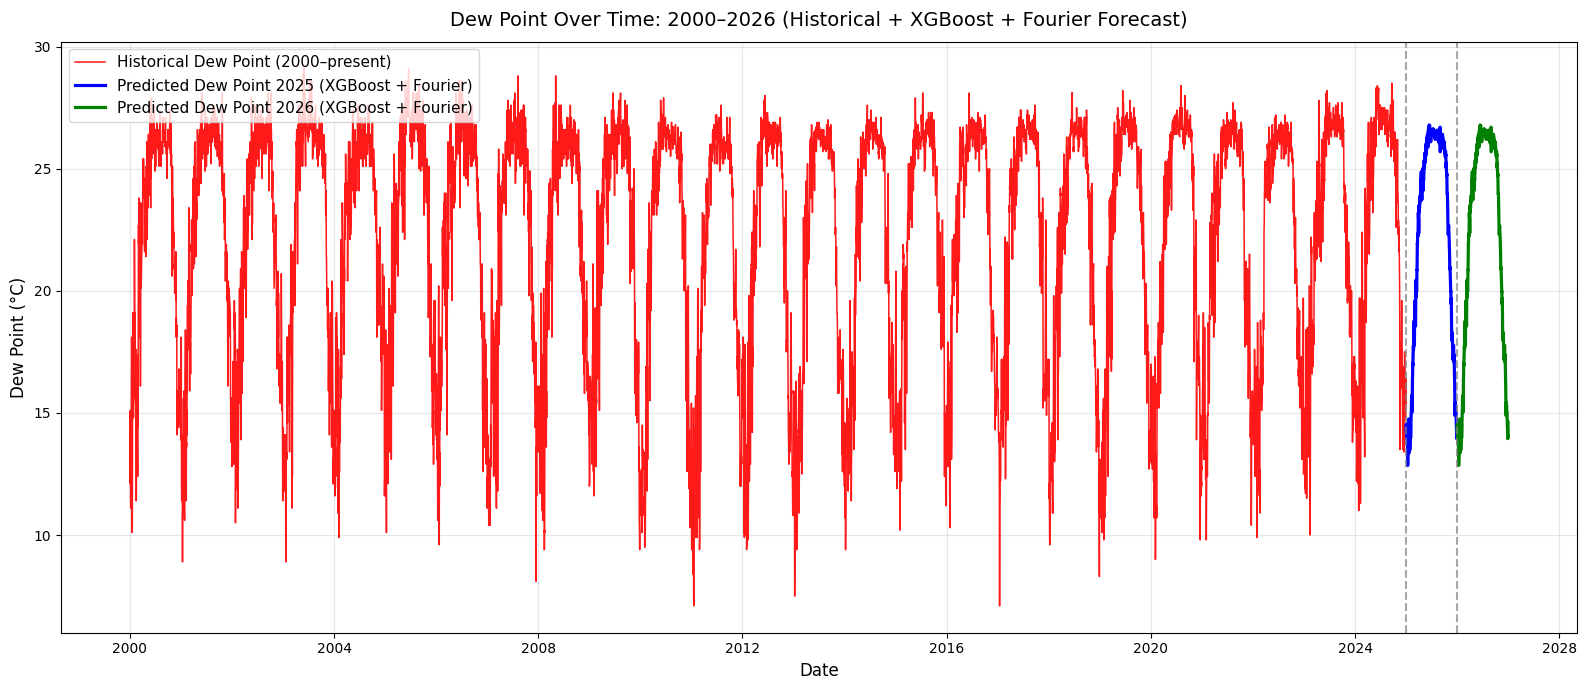

Saved: dewpoint_forecast_2025_xgb_fourier.csv
Saved: dewpoint_forecast_2026_xgb_fourier.csv


In [17]:
# --------------------------------------------------------------
# Forecast Dew Point (2025 & 2026) using XGBoost + Fourier Features
# --------------------------------------------------------------
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xgboost as xgb

from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error

# -----------------------------
# Replace this with your DataFrame
# -----------------------------
# df_hist_source must be present in your environment:
# e.g. with_no_null_dew_point as provided earlier.
df_hist = with_no_null_dew_point.copy()

# Ensure date column exists and is datetime
if 'date' not in df_hist.columns:
    df_hist['date'] = pd.to_datetime(df_hist[['year', 'month', 'day']])

# Sort and reset index
df_hist = df_hist.sort_values('date').reset_index(drop=True)

# Keep a copy for plotting historical >= 2000 later
df_hist_2000 = df_hist[df_hist['date'] >= pd.to_datetime('2000-01-01')].copy()

# -----------------------------------------------------------------
# Create Fourier Features on historical data (full range)
# -----------------------------------------------------------------
# Continuous time index (t) for Fourier features (start at 0)
df_hist = df_hist.sort_values('date').reset_index(drop=True)
df_hist['t'] = np.arange(len(df_hist))

T = 365   # yearly period (days)
K = 3     # number of harmonics

for k in range(1, K+1):
    df_hist[f'sin_{k}'] = np.sin(2 * np.pi * k * df_hist['t'] / T)
    df_hist[f'cos_{k}'] = np.cos(2 * np.pi * k * df_hist['t'] / T)

# -----------------------------------------------------------------
# Define features & target (for training / predictions)
# -----------------------------------------------------------------
FEATURES = [
    'temperature(degree C)', 'humidity',
    'sin_1', 'cos_1',
    'sin_2', 'cos_2',
    'sin_3', 'cos_3'
]
TARGET = 'dew_point'

# Ensure required columns exist
missing_cols = [c for c in ['temperature(degree C)', 'humidity', TARGET] if c not in df_hist.columns]
if missing_cols:
    raise ValueError(f"Missing required columns in df_hist: {missing_cols}")

# -----------------------------------------------------------------
# Train XGBoost if not available in namespace
# -----------------------------------------------------------------
# If you already have xgb_model trained in your session, this will use it.
# Otherwise the script will train a fresh one on the available historical data.
if 'xgb_model' not in globals() and 'xgb_model' not in locals():
    print("xgb_model not found — training XGBoost on historical data with Fourier features...")
    # Use all historical rows that have non-null features/target
    train_df = df_hist.dropna(subset=FEATURES + [TARGET]).copy()
    X = train_df[FEATURES]
    y = train_df[TARGET].astype(float)

    X_train, X_val, y_train, y_val = train_test_split(
        X, y, test_size=0.2, random_state=42, shuffle=True
    )

    xgb_model = xgb.XGBRegressor(
        n_estimators=500,
        learning_rate=0.05,
        max_depth=6,
        min_child_weight=1,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42,
        n_jobs=-1,
        objective='reg:squarederror',
        verbosity=0
    )

    xgb_model.fit(X_train, y_train, eval_set=[(X_val, y_val)], early_stopping_rounds=50, verbose=False)

    # Quick validation metrics
    val_pred = xgb_model.predict(X_val)
    print("Validation R²:", r2_score(y_val, val_pred).__round__(4))
    print("Validation RMSE:", np.sqrt(mean_squared_error(y_val, val_pred)).__round__(4))
else:
    print("Using existing xgb_model from the session.")

# -----------------------------------------------------------------
# Prepare climatology (mean temp & humidity per month-day) from history
# -----------------------------------------------------------------
hist = df_hist.copy()
hist['month'] = hist['date'].dt.month
hist['day']   = hist['date'].dt.day

clim = (
    hist.groupby(['month', 'day'])[['temperature(degree C)', 'humidity']]
    .mean()
    .reset_index()
    .rename(columns={
        'temperature(degree C)': 'temp_clim',
        'humidity': 'hum_clim'
    })
)

# Recent fallback values (7-day mean)
recent_temp = hist['temperature(degree C)'].tail(7).mean()
recent_hum  = hist['humidity'].tail(7).mean()

# -----------------------------------------------------------------
# Helper: create future dataframe with climatology and Fourier features
# -----------------------------------------------------------------
def make_future_df(start_date, n_days, base_hist_df, clim_df, recent_temp, recent_hum, T=365, K=3):
    future_dates = pd.date_range(start=start_date, periods=n_days, freq='D')
    future_df = pd.DataFrame({'date': future_dates})
    future_df['year']  = future_df['date'].dt.year
    future_df['month'] = future_df['date'].dt.month
    future_df['day']   = future_df['date'].dt.day

    # Merge climatology
    future_with_clim = future_df.merge(clim_df, on=['month', 'day'], how='left')

    # Fill missing climatology with recent means
    future_with_clim['temp_clim'] = future_with_clim['temp_clim'].fillna(recent_temp)
    future_with_clim['hum_clim']  = future_with_clim['hum_clim'].fillna(recent_hum)

    # assign predictors (temperature & humidity) for forecast input
    future_with_clim['temperature(degree C)'] = future_with_clim['temp_clim']
    future_with_clim['humidity'] = future_with_clim['hum_clim']

    # Create continuous time index t that continues from base history
    last_t = base_hist_df['t'].max()
    future_with_clim = future_with_clim.reset_index(drop=True)
    future_with_clim['t'] = np.arange(last_t + 1, last_t + 1 + len(future_with_clim))

    # Fourier features
    for k in range(1, K+1):
        future_with_clim[f'sin_{k}'] = np.sin(2 * np.pi * k * future_with_clim['t'] / T)
        future_with_clim[f'cos_{k}'] = np.cos(2 * np.pi * k * future_with_clim['t'] / T)

    return future_with_clim

# -----------------------------------------------------------------
# 2025 Forecast (365 days) - start from the day after the last historical date
# -----------------------------------------------------------------
last_date = df_hist['date'].max()
start_2025 = last_date + pd.Timedelta(days=1)
n_days_2025 = 365

future_2025 = make_future_df(start_2025, n_days_2025, df_hist, clim, recent_temp, recent_hum, T=T, K=K)

# Ensure features exist and are in the expected order
X_future_2025 = future_2025[FEATURES].copy()
pred_2025 = xgb_model.predict(X_future_2025)
future_2025_out = future_2025[['date', 'year', 'month', 'day']].copy()
future_2025_out['pred_dew_point'] = np.round(pred_2025, 2)

# -----------------------------------------------------------------
# 2026 Forecast (365 days) - start after 2025 last forecast date
# -----------------------------------------------------------------
last_2025 = future_2025['date'].max()
start_2026 = last_2025 + pd.Timedelta(days=1)
n_days_2026 = 365

# Note: reuse same clim and recent_temp/hum
future_2026 = make_future_df(
    start_2026, n_days_2026,
    pd.concat([df_hist, future_2025], ignore_index=True),
    clim, recent_temp, recent_hum, T=T, K=K
)


X_future_2026 = future_2026[FEATURES].copy()
pred_2026 = xgb_model.predict(X_future_2026)
future_2026_out = future_2026[['date', 'year', 'month', 'day']].copy()
future_2026_out['pred_dew_point'] = np.round(pred_2026, 2)

# -----------------------------------------------------------------
# Plot: Historical (>=2000) + 2025 + 2026 forecasts
# -----------------------------------------------------------------
plt.figure(figsize=(16, 7))

# Historical (2000–last)
plt.plot(
    df_hist_2000['date'],
    df_hist_2000['dew_point'],
    label='Historical Dew Point (2000–present)',
    color='red',
    linewidth=1.1,
    alpha=0.9
)

# 2025 Forecast
plt.plot(
    future_2025_out['date'],
    future_2025_out['pred_dew_point'],
    label='Predicted Dew Point 2025 (XGBoost + Fourier)',
    color='blue',
    linewidth=2.3
)

# 2026 Forecast
plt.plot(
    future_2026_out['date'],
    future_2026_out['pred_dew_point'],
    label='Predicted Dew Point 2026 (XGBoost + Fourier)',
    color='green',
    linewidth=2.3
)

# Styling
plt.xlabel('Date', fontsize=12)
plt.ylabel('Dew Point (°C)', fontsize=12)
plt.title('Dew Point Over Time: 2000–2026 (Historical + XGBoost + Fourier Forecast)', fontsize=14, pad=12)
plt.legend(fontsize=11, loc='upper left')
plt.grid(True, alpha=0.3)

# Year separators
plt.axvline(pd.to_datetime('2025-01-01'), color='gray', linestyle='--', alpha=0.7)
plt.axvline(pd.to_datetime('2026-01-01'), color='gray', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# -----------------------------------------------------------------
# Save forecasts (optional)
# -----------------------------------------------------------------
future_2025_out.to_csv('dewpoint_forecast_2025_xgb_fourier.csv', index=False)
future_2026_out.to_csv('dewpoint_forecast_2026_xgb_fourier.csv', index=False)

print("Saved: dewpoint_forecast_2025_xgb_fourier.csv")
print("Saved: dewpoint_forecast_2026_xgb_fourier.csv")


#Plot: 2025 Actual vs Predicted Data

Loading 2025 actual data from CSV...
CSV shape: (324, 15)
Columns: ['district', 'day', 'month', 'year', 'temperature(degree C)', 'feels_like(degree C)', 'max_temperature(degree C)', 'minimum_temperature(degree C)', 'humidity', 'precipitation', 'windspeed', 'atmospheric_pressure', 'UV', 'solar_radiation', 'dew_point']

First 5 rows:
   district  day  month  year  temperature(degree C)  feels_like(degree C)  \
0  Bagerhat    1      1  2025                   18.2                  18.2   
1  Bagerhat    2      1  2025                   17.0                  17.0   
2  Bagerhat    3      1  2025                   16.1                  16.1   
3  Bagerhat    4      1  2025                   16.8                  16.8   
4  Bagerhat    5      1  2025                   17.6                  17.6   

   max_temperature(degree C)  minimum_temperature(degree C)  humidity  \
0                       23.7                           14.8      83.4   
1                       22.5                       

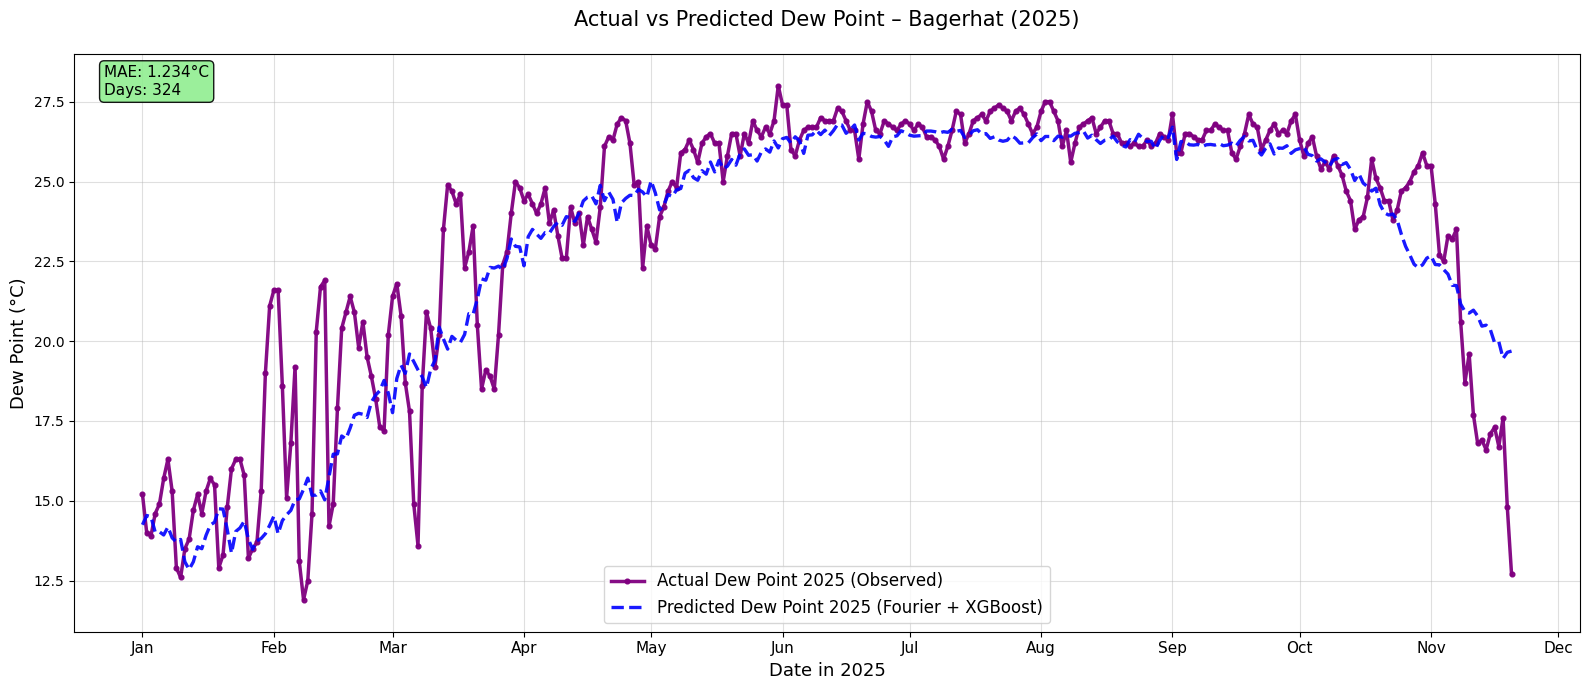


SUCCESS! MAE = 1.234°C over 324 days.


In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# ==============================================================
# 1. LOAD ACTUAL 2025 DATA FROM CSV
# ==============================================================
print("Loading 2025 actual data from CSV...")

actual_2025_csv = pd.read_csv("Bagerhat_historical_weather_2025.csv")

print(f"CSV shape: {actual_2025_csv.shape}")
print("Columns:", actual_2025_csv.columns.tolist())
print("\nFirst 5 rows:")
print(actual_2025_csv.head())

# Create date column
actual_2025_csv["date"] = pd.to_datetime(
    actual_2025_csv[["year", "month", "day"]],
    errors="coerce"
)

# Drop invalid dates
actual_2025_csv = actual_2025_csv.dropna(subset=["date"])

# Sort and index
actual_2025 = actual_2025_csv.sort_values("date").set_index("date")

print(f"\nActual 2025 data: {len(actual_2025)} days")
print(f"From {actual_2025.index.min().date()} to {actual_2025.index.max().date()}")


# ==============================================================
# 2. PREPARE MODEL PREDICTION 2025 (using future_2025_out)
# ==============================================================
print("\nPreparing model forecast (future_2025_out)...")

pred = future_2025_out.copy()

# Ensure date column exists
pred["date"] = pd.to_datetime(pred["date"], errors="coerce")
pred = pred.dropna(subset=["date"]).set_index("date")

# Keep only 2025 predictions
pred_2025_full = pred[pred.index.year == 2025]

# Match exactly the range of actual data
start_date = actual_2025.index.min()
end_date = actual_2025.index.max()

pred_2025 = pred_2025_full.loc[start_date:end_date]

print(f"Prediction trimmed to: {len(pred_2025)} days")
print(f"From {pred_2025.index.min().date()} to {pred_2025.index.max().date()}")


# ==============================================================
# 3. PLOT — ACTUAL vs PREDICTED
# ==============================================================
plt.figure(figsize=(16, 7))

# Actual
plt.plot(
    actual_2025.index,
    actual_2025["dew_point"],
    label="Actual Dew Point 2025 (Observed)",
    color="purple",
    linewidth=2.5,
    marker="o",
    markersize=3.4,
    alpha=0.95
)

# Predicted
plt.plot(
    pred_2025.index,
    pred_2025["pred_dew_point"],
    label="Predicted Dew Point 2025 (Fourier + XGBoost)",
    color="blue",
    linewidth=2.4,
    linestyle="--",
    alpha=0.9
)


# ==============================================================
# 4. STYLE + STATS
# ==============================================================
plt.xlabel("Date in 2025", fontsize=13)
plt.ylabel("Dew Point (°C)", fontsize=13)

plt.title(
    "Actual vs Predicted Dew Point – Bagerhat (2025)",
    fontsize=15,
    pad=20
)

# Monthly ticks
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter("%b"))
plt.xticks(rotation=0, fontsize=11)

plt.legend(fontsize=12)
plt.grid(True, alpha=0.4)

# Y-axis limits
y_min = min(actual_2025["dew_point"].min(), pred_2025["pred_dew_point"].min()) - 1
y_max = max(actual_2025["dew_point"].max(), pred_2025["pred_dew_point"].max()) + 1
plt.ylim(y_min, y_max)

# MAE calculation
mae = (actual_2025["dew_point"] - pred_2025["pred_dew_point"]).abs().mean()

plt.text(
    0.02, 0.98,
    f"MAE: {mae:.3f}°C\nDays: {len(actual_2025)}",
    transform=ax.transAxes,
    fontsize=11,
    verticalalignment="top",
    bbox=dict(boxstyle="round", facecolor="lightgreen", alpha=0.9)
)

plt.tight_layout()
plt.show()

print(f"\nSUCCESS! MAE = {mae:.3f}°C over {len(actual_2025)} days.")
